# Heart Disease Classification Project 

In this project, we will try to build an efficient machine learning model that predicts whether a patient has heart disease or not.
Using different techniques, we will divide the project into 7 steps :

* 1. Dataset description 
* 2. Evaluation
* 3. Exploratory Data Analysis
* 4. Choosing the right estimator/model (Modelling)
* 5. Tuning the model to improve its efficiency 
* 6. Evaluating the model
* 7. Feature Importance
* 8. Saving the model 
* 9. Deploying the model

## 1. Dataset description 

### The dataset used consists of informations about patients of a hospital and whether they have heart disease or not.

### Target variable :

* Target : describes whether the patient has heart disease or not. 
* Values : 0 for no heart disease and 1 for heart disease

### Feature variables :

* **age :** the age of the patient
* **sex :** sex of the patient
* **cp :** Chest pain type of the patient ([typical angina, atypical angina, non-anginal, asymptomatic])
* **trestbps :** The person's resting blood pressure
* **chol :** cholesterol level of the patient
* **fbs :** (if fasting blood sugar > 120 mg/dl)
* **restecg :** (resting electrocardiographic results)
* **thalach :** maximum heart rate achieved
* **exang :** exercise-induced angina (True/ False)
* **oldpeak :** ST depression induced by exercise relative to rest
* **slope :** the slope of the peak exercise ST segment
* **ca :** number of major vessels (0-3) colored by fluoroscopy
* **thal :** [normal; fixed defect; reversible defect]

## 2. Evaluation 

> if we can achieve +85% accuracy of predicting the heart disease, we will pursue with this project.

## 3. Exploratory Data Analysis

In [2]:
#importing the different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#loading the data
df=pd.read_csv("Data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#Gaining info about the different datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Exploring the target variable : how many classes are in the target variable and what is the distribution of the values?
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: title={'center': 'Distribution of the target variable'}>

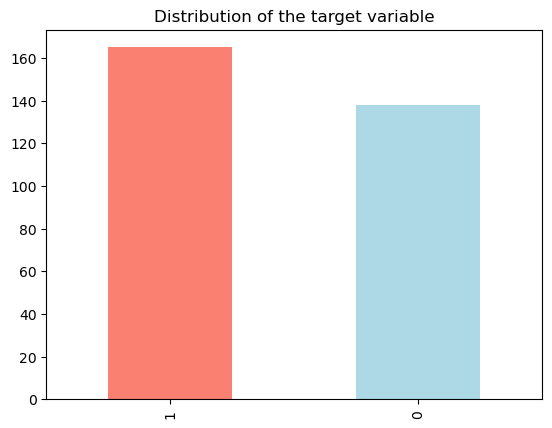

In [106]:
#plotting the classes of the target variable 
df["target"].value_counts().plot(kind='bar',color=["salmon","lightblue"],title="Distribution of the target variable")

In [8]:
#how many missing values are there ?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#information about the numerical variables 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease according to the chest pain type of the patient

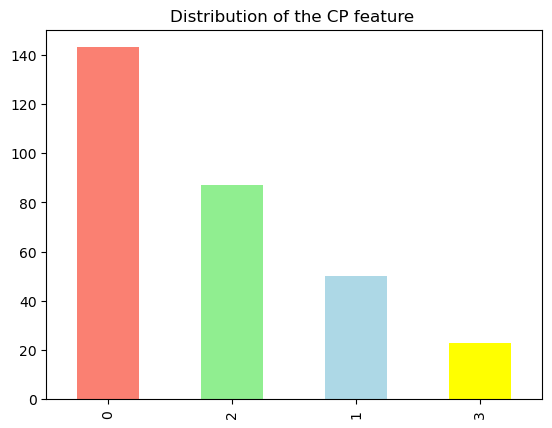

In [105]:
df["cp"].value_counts().plot(kind='bar',color=["salmon",'lightgreen','lightblue','yellow'],title="Distribution of the CP feature ");

In [11]:
pd.crosstab(df.cp,df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


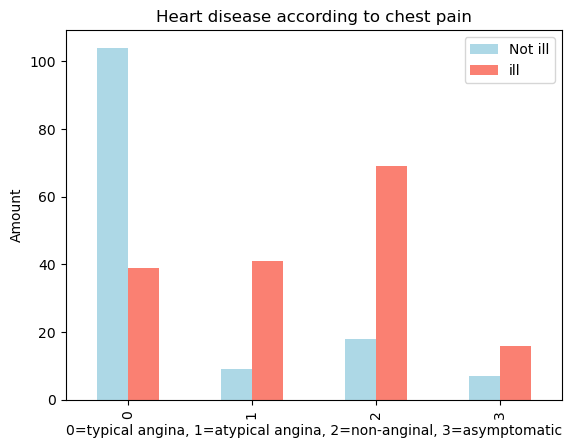

In [12]:
#Relationship between the cp and the target 
fig=pd.crosstab(df["cp"],df["target"]).plot(kind="bar",color=["lightblue","salmon"],ylabel="Amount",xlabel="0=typical angina, 1=atypical angina, 2=non-anginal, 3=asymptomatic",title="Heart disease according to chest pain")
fig.legend(["Not ill",'ill']);

**Main takeaways from this :**
* According to the dataset, people with typical angina chest pain have a 27.3% chance of having heart disease.
* According to the dataset, people with atypical angina chest pain have a 82% chance of having heart disease.
* According to the dataset, people with non-anginal chest pain have a 79.3% chance of having heart disease.
* According to the dataset, people with asymptomatic chest pain have a 69.6% chance of having heart disease.

### Heart Disease according to the age of the patient

In [13]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [14]:
pd.crosstab(pd.cut(df.age,bins=4),df.target)

target,0,1
age,,
"(28.952, 41.0]",7,22
"(41.0, 53.0]",31,68
"(53.0, 65.0]",84,58
"(65.0, 77.0]",16,17


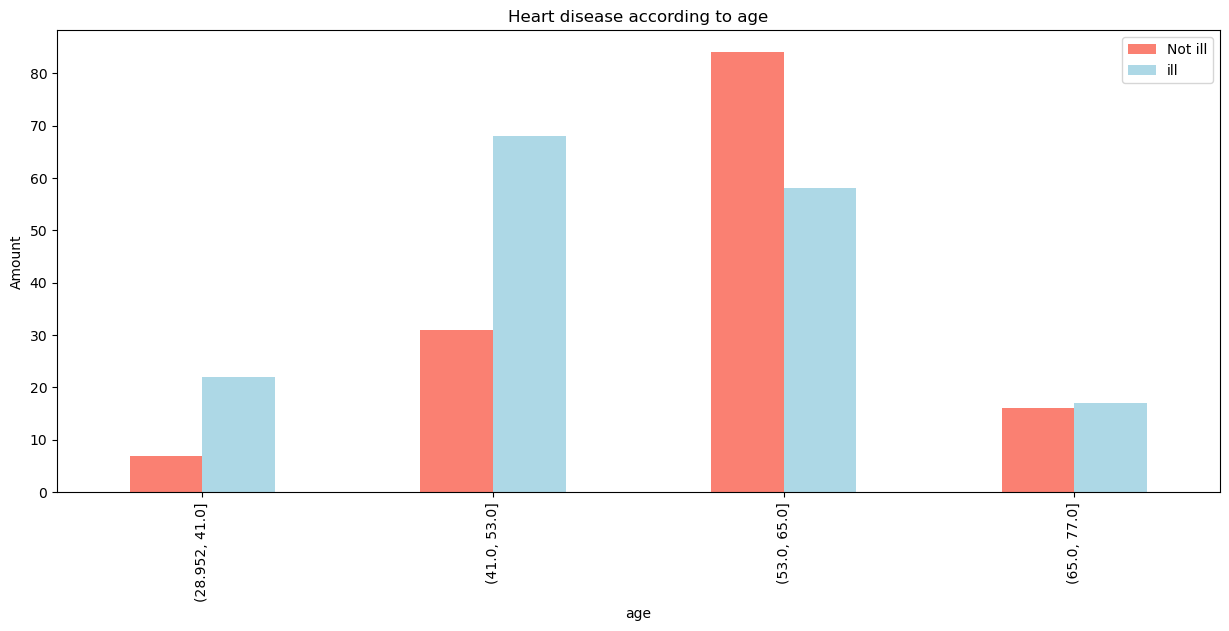

In [117]:
fig2=pd.crosstab(pd.cut(df.age,bins=4),df.target).plot(kind='bar',color=["salmon","lightblue"],figsize=(15,6),ylabel="Amount",title="Heart disease according to age")
fig2.legend(["Not ill",'ill']);

**Main takaways from this :**
* According to the dataset, patients between 34 and 41 years old have a 75.9% chance of having heart disease
* According to the dataset, patients between 41 and 53 years old have a 68.7% chance of having heart disease
* According to the dataset, patients between 53 and 65 years old have a 40.8% chance of having heart disease
* According to the dataset, patients between 65 and 77 years old have a 51.5% chance of having heart disease

### Age vs Cholesterol levels 

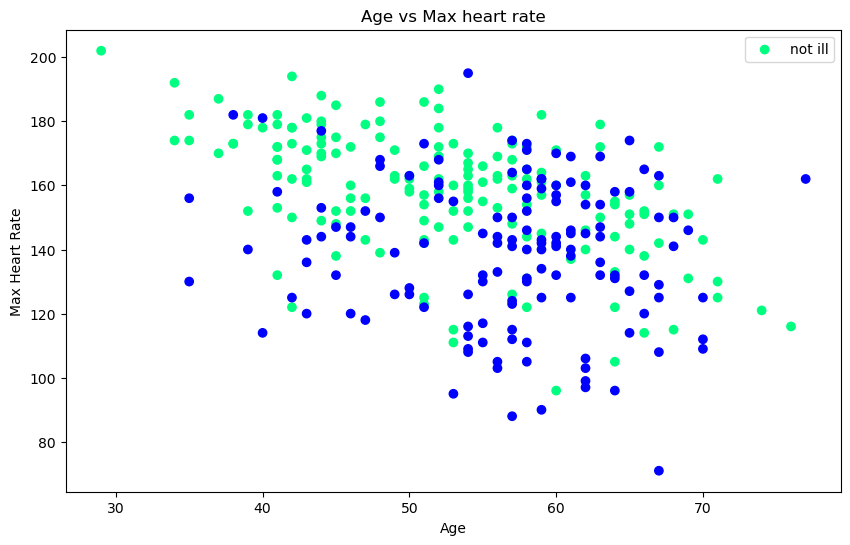

In [16]:
fig3=plt.figure(figsize=(10,6))
plt.scatter(x=df.age,y=df.thalach,c=df.target,cmap="winter")
plt.legend(["not ill","ill"])
plt.title("Age vs Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

> Notice that there is a downgrade relationship between the age and the max heart rate, as if a patient is younger, they have higher maximum heart rate.

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Distribution Analysis

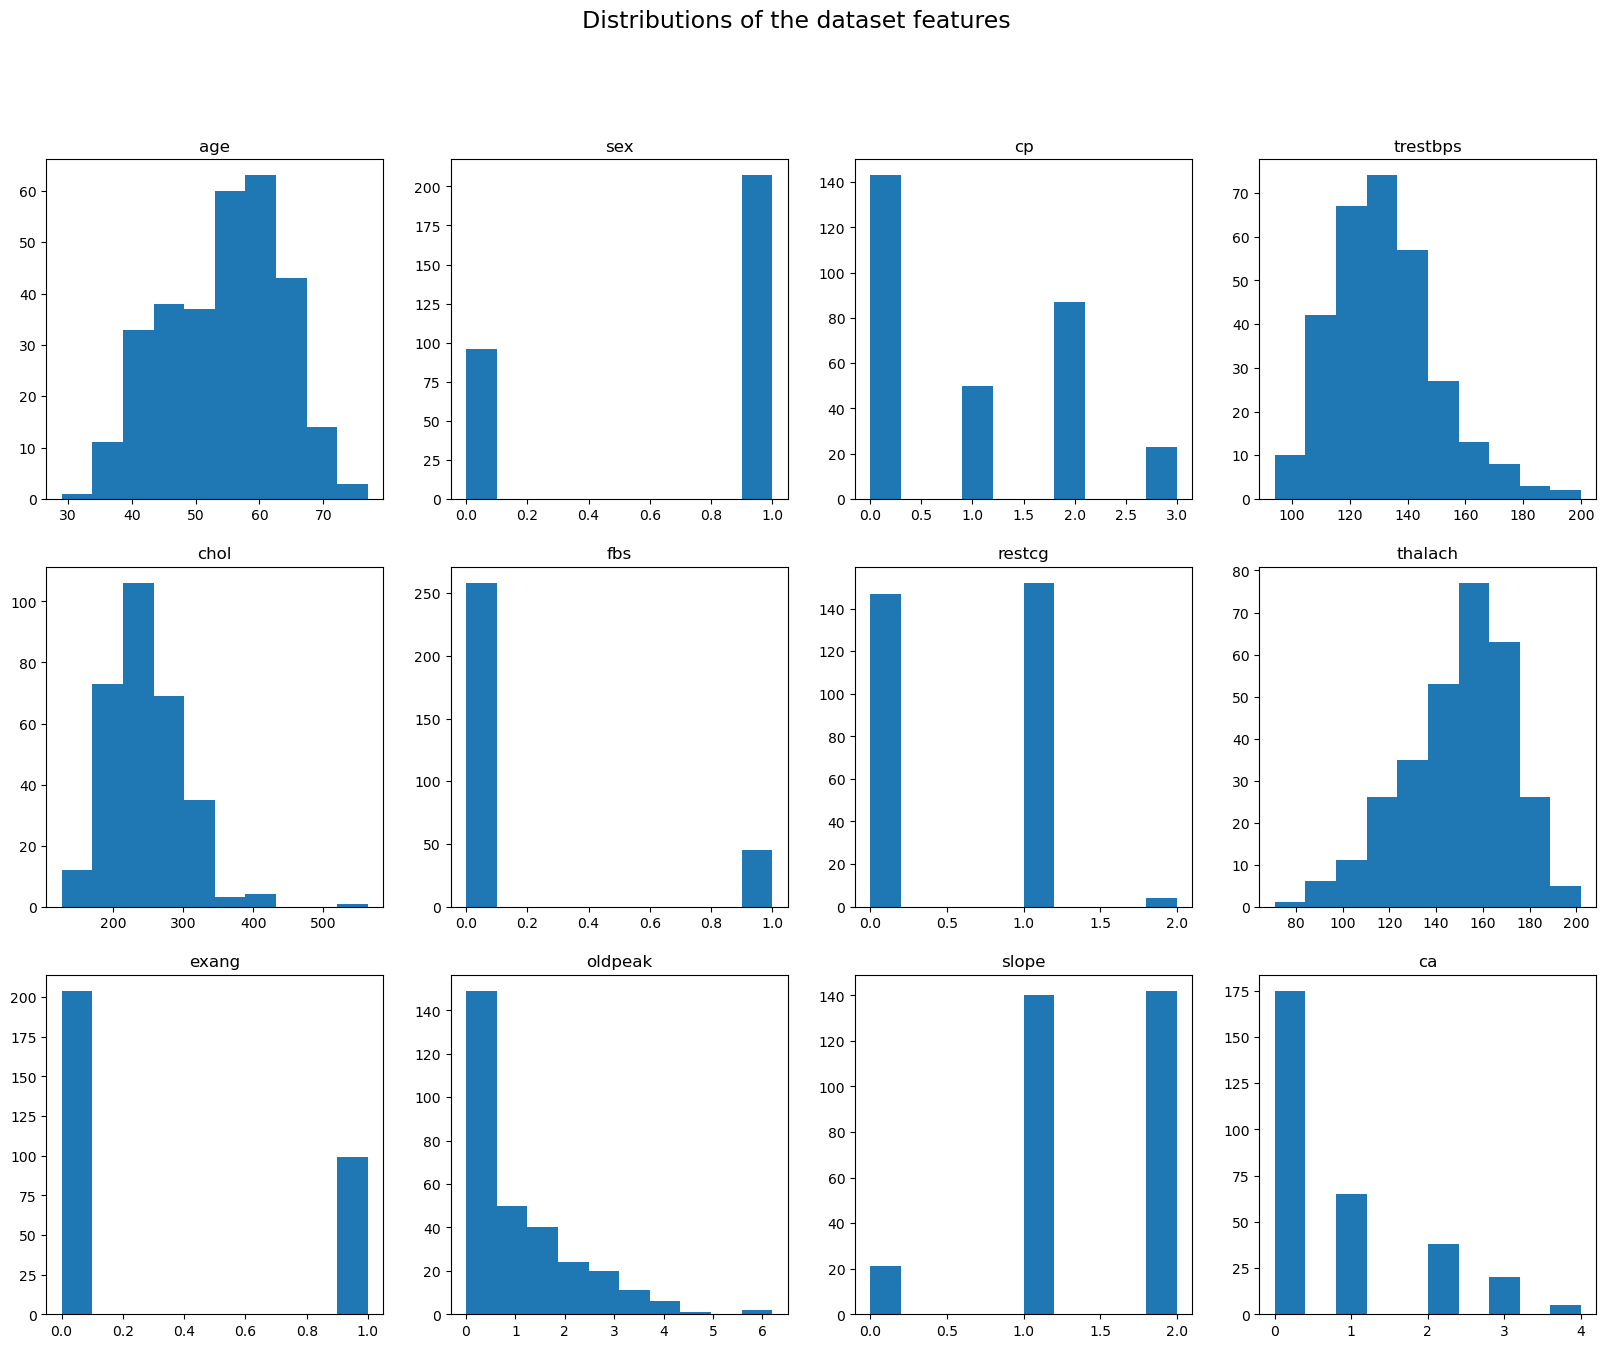

In [102]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12))=plt.subplots(figsize=(20,15),ncols=4,nrows=3)
fig.suptitle("Distributions of the dataset features",fontsize=17.)
ax1.hist(df.age)
ax1.set(title="age")
ax2.hist(df.sex)
ax2.set(title="sex")
ax3.hist(df.cp)
ax3.set(title="cp")
ax4.hist(df.trestbps)
ax4.set(title="trestbps")
ax5.hist(df.chol)
ax5.set(title="chol")
ax6.hist(df.fbs)
ax6.set(title="fbs")
ax7.hist(df.restecg)
ax7.set(title="restcg")
ax8.hist(df.thalach)
ax8.set(title="thalach")
ax9.hist(df.exang)
ax9.set(title="exang")
ax10.hist(df.oldpeak)
ax10.set(title="oldpeak")
ax11.hist(df.slope)
ax11.set(title="slope")
ax12.hist(df.ca)
ax12.set(title="ca");

### Correlation Analysis

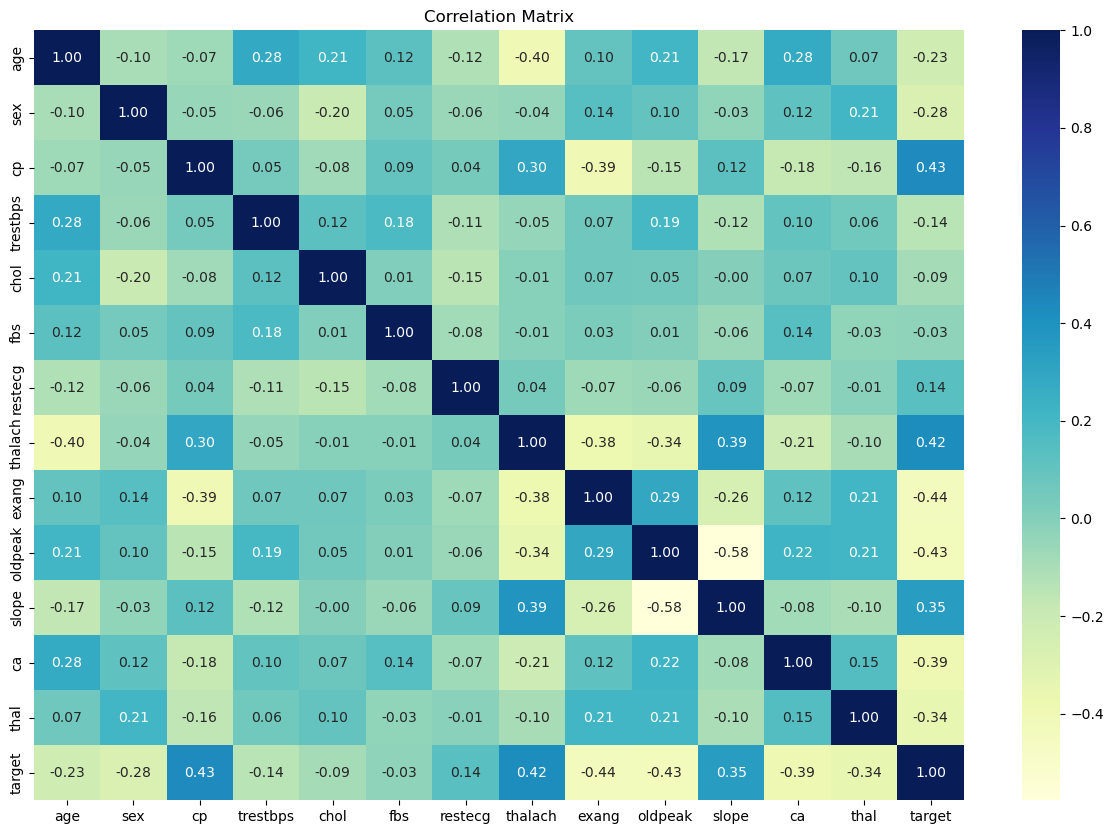

In [99]:
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",fmt='.2f');
ax.set(title="Correlation Matrix");

**Main takaways :**
* According to the matrix, the features that are most positively correlated to the target variable are the chest pain type, the max heart rate and the slope variables
* According to the matrix, the features that are most negatively correlated to the target variable are the exang, ca, oldpeak and the thal variables

## 4. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#Splitting the data into features and label matrices 
X,y=df.drop("target",axis=1),df["target"]

#Splitting the data into train and test splits
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Now after we split the data, it's time to build the machine learning model!!

In [4]:
#importing the models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

Before we go ahead with the modelling, we will write a function that takes the predictions and the true labels to evaluate each model we use.

In [12]:
def evaluation_preds(y_true,y_preds) :
    """
    Returns an array of different scores of a model, takes the predictions and the true labels
    """
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    clf_metrics={"Accuracy" : round(accuracy_score(y_true,y_preds),2),
                 "Precision":round(precision_score(y_true,y_preds),2),
                 "Recall ": round(recall_score(y_true,y_preds),2),
                 "F1":round(f1_score(y_true,y_preds),2)}
    #print(f"Accuracy : {round(accuracy_score(y_true,y_preds)*100,2)}%")
    #print(f"Precision : {round(precision_score(y_true,y_preds),2)}")    
    #print(f"Recall : {round(recall_score(y_true,y_preds),2)}")    
    #print(f"F1 : {round(f1_score(y_true,y_preds),2)}")

    return clf_metrics

In [29]:
clfs={"Logistic Regression" : LogisticRegression(),
      "K-Nearest Neighors" : KNeighborsClassifier(),
      "Random Forest" : RandomForestClassifier()}
def fit_score_models(clfs,X_train,X_test,y_train,y_test) :
    np.random.seed(32)
    model_metrics={}
    for model_name,model in clfs.items() :
        model.fit(X_train,y_train)
        y_preds=model.predict(X_test)
        model_metrics[model_name]=evaluation_preds(y_test,y_preds)
        #model_metrics[model_name]=cross_val_preds(model,X,y)
    return model_metrics

In [30]:
model_metrics=fit_score_models(clfs,X_train,X_test,y_train,y_test)
for model_name,model_metric in model_metrics.items() :
    print(f"{model_name} metrics are :")
    print(model_metric)
    print("")

Logistic Regression metrics are :
{'Accuracy': 0.89, 'Precision': 0.88, 'Recall ': 0.91, 'F1': 0.89}

K-Nearest Neighors metrics are :
{'Accuracy': 0.69, 'Precision': 0.69, 'Recall ': 0.75, 'F1': 0.72}

Random Forest metrics are :
{'Accuracy': 0.85, 'Precision': 0.87, 'Recall ': 0.84, 'F1': 0.86}



### Model Comparison 

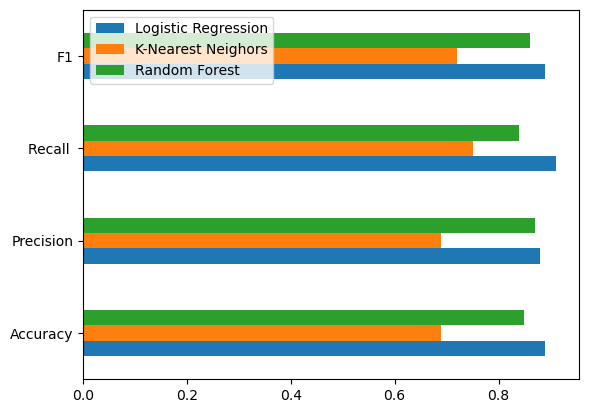

In [115]:
pd.DataFrame(model_metrics).plot(kind="barh")
plt.legend(loc="upper left")

> we can see here that the best performing baseline model was the logistic regression model, so we are going to make some adjustements on the models to see which one is better this time.

In [32]:
#trying the same approach but with tweaks in the hyperparameters
clfs_2={"Logistic Regression" : LogisticRegression(max_iter=2000,penalty="l2"),
      "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors=8,algorithm="brute"),
      "Random Forest" : RandomForestClassifier(n_estimators=500)}
model_metrics_2=fit_score_models(clfs_2,X_train,X_test,y_train,y_test)
for model_name,model_metric in model_metrics_2.items() :
    print(f"{model_name} metrics are :")
    print(model_metric)
    print("")

Logistic Regression metrics are :
{'Accuracy': 0.89, 'Precision': 0.88, 'Recall ': 0.91, 'F1': 0.89}

K-Nearest Neighbors metrics are :
{'Accuracy': 0.69, 'Precision': 0.71, 'Recall ': 0.69, 'F1': 0.7}

Random Forest metrics are :
{'Accuracy': 0.85, 'Precision': 0.85, 'Recall ': 0.88, 'F1': 0.86}



### Second Model Comparison 

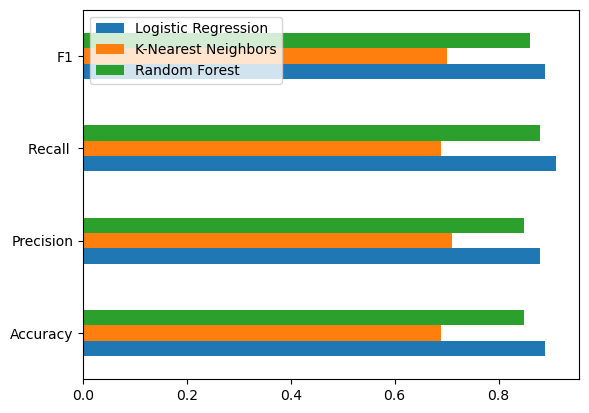

In [114]:
pd.DataFrame(model_metrics_2).plot(kind="barh")
plt.legend(loc="upper left");

> As we can see, the logistic regression model is still the best model, but the RF model is relatively close to it, meanwhile as we can also see, the KNN model isn't performing well, so we will drop it for now.

## 5. Hyperparameter Tuning

We will continue with the logistic regression model as well as the random forest one for now.

### 5.1. Log Regression Model 

In [9]:
#GridSearchCV for the logistic regression model
from sklearn.model_selection import GridSearchCV

grid_log={"penalty": ["l2","l1"],
          "solver" : ['liblinear'],
          "max_iter" : [1000,2000,3000],
          "C" :np.logspace(-4, 4, 20)}

clf_log=LogisticRegression()
gs_clf_log=GridSearchCV(estimator=clf_log,param_grid=grid_log,cv=5,verbose=2,refit=True)

gs_clf_log.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_i

[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329

[CV] END C=0.012742749857031334, max_iter=3000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_ite

[CV] END C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2000, penalty=l2, sol

[CV] END C=11.288378916846883, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2000, pena

[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2000, penalty=l1, solver=libline

[CV] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2000, penalty=l1, sol

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
             verbose=2)

In [10]:
gs_clf_log.best_params_

{'C': 0.23357214690901212,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [13]:
y_preds=gs_clf_log.predict(X_test)
gs_clf_log_metrics=evaluation_preds(y_test,y_preds)
gs_clf_log_metrics

{'Accuracy': 0.89, 'Precision': 0.88, 'Recall ': 0.91, 'F1': 0.89}

### 5.2. Random Forest Model 

In [37]:
#create the grid 
grid_rf={
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

clf_rf=RandomForestClassifier()
gs_clf_rf=GridSearchCV(estimator=clf_rf,param_grid=grid_rf,cv=5,verbose=2,refit=True)
gs_clf_rf.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] 

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   2.3s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   7.4s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_l

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   6.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   4.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   2.7s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   7.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   6.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   7.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   5.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   5.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sampl

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   7.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   7.7s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   8.5s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   7.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   6.6s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   5.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   5.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   5.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   6.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   5.3s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   5.4s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.9s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   5.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=  13.5s
[CV] END bootstrap=True, max_depth=110, max_features=2

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   6.5s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   5.2s
[CV] END bootstrap=True, max_depth=110, max_features=

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   3.7s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   3.6s
[CV] END bootstrap=True, max_depth=110, max_features

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   4.4s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   4.6s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   5.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   5.2s
[CV] END bootstrap=True, max_depth=110, max_feature

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   9.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   7.4s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   9.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   7.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   5.7s
[CV] END bootstrap=True, max_depth=110, max_featur

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   7.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  21.7s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  21.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=  17.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   9.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   8.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_featur

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [38]:
gs_clf_rf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [39]:
y_preds=gs_clf_rf.predict(X_test)
gs_clf_rf_metrics=evaluation_preds(y_test,y_preds)
gs_clf_rf_metrics

{'Accuracy': 0.87, 'Precision': 0.85, 'Recall ': 0.91, 'F1': 0.88}

### GridSearchCV best models Comparison 

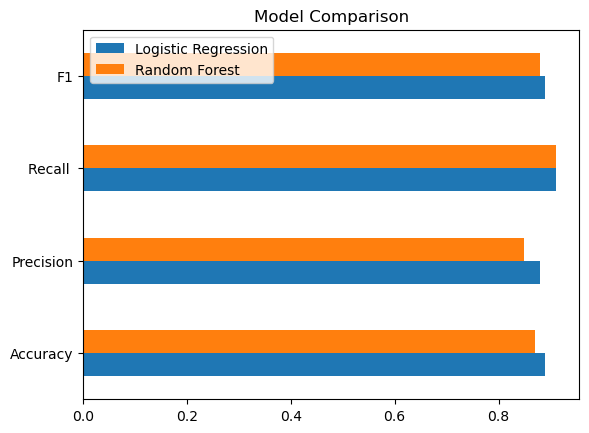

In [112]:
pd.DataFrame({"Logistic Regression":gs_clf_log_metrics, "Random Forest":gs_clf_rf_metrics}).plot(kind="barh",title="Model Comparison")
plt.legend(loc="upper left");

> As we can see, the logistic regression model is still the best, so we are going to continue with it.

## 6. Evaluating the chosen model 

So now we want to do :
* A ROC Curve and an AUC score
* a Confusion Matrix
* Classification report
* Accuracy, precision, recall and f1 cross-validated scores

#### ROC Curve and AUC score 

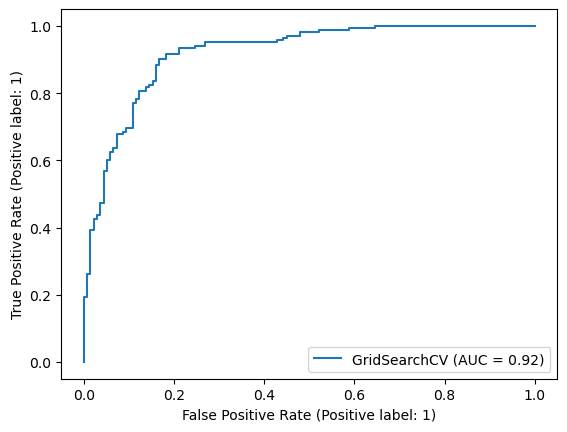

In [46]:
#plotting a ROC curve using sklearn
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_clf_log,X,y);

> So, our model's ROC curve looks pretty good, also it got an AUC score of 0.92 which is considered outstanding for machine learning models.

#### Confusion Matrix 

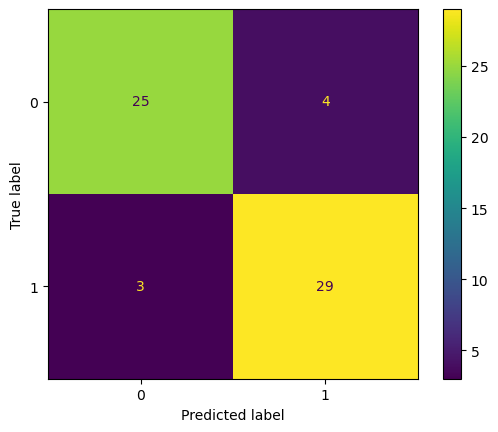

In [50]:
#we will get and plot the confusion matrix using sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs_clf_log,X_test,y_test);

> So, as seen in our confusion matrix, we have about 3 false positives and 4 false negatives, which is considered pretty good.

#### Classification Report

In [66]:
from sklearn.metrics import classification_report
y_preds=gs_clf_log.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Accuracy, Precision, Recall and F1 cross-validated scores 

In [79]:
from sklearn.model_selection import cross_val_score
clf_metrics={"Accuracy" : round(np.mean(cross_val_score(gs_clf_log.best_estimator_,X,y,scoring="accuracy",cv=5)),2),
             "Precision" : round(np.mean(cross_val_score(gs_clf_log.best_estimator_,X,y,scoring="precision",cv=5)),2),
             "Recall" : round(np.mean(cross_val_score(gs_clf_log.best_estimator_,X,y,scoring="recall",cv=5)),2),
             "F1" : round(np.mean(cross_val_score(gs_clf_log.best_estimator_,X,y,scoring="f1",cv=5)),2)}
print("The Cross-validated scores of our best model are :")
print("")
for metric_name,metric_value in clf_metrics.items() :
    if metric_name=="F1" :
        print(metric_name + ": " + str(metric_value)) 
    else :
        print(metric_name + ": " + str(metric_value),end=", ")

The Cross-validated scores of our best model are :

Accuracy: 0.85, Precision: 0.82, Recall: 0.93, F1: 0.87


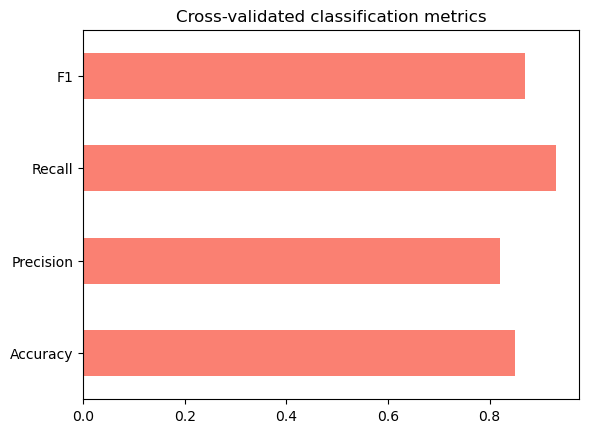

In [107]:
#visualize our metrics 
pd.DataFrame(clf_metrics,index=[0]).T.plot(kind='barh',color=["Salmon"],legend=False,title='Cross-validated classification metrics');

> These are some great values.

## Feature Importance

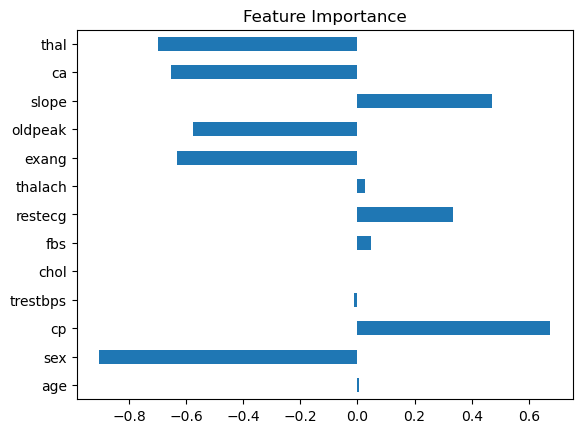

In [90]:
#checking the coef_
pd.DataFrame(gs_clf_log.best_estimator_.coef_,columns=X.columns).T.plot(kind="barh",legend=False,title="Feature Importance");

As we can see, the features that are most important in our model's predictions are : 

* **sex :** sex of the patient
* **cp :** Chest pain type of the patient ([typical angina, atypical angina, non-anginal, asymptomatic])
* **restecg :** (resting electrocardiographic results)
* **exang :** exercise-induced angina (True/ False)
* **oldpeak :** ST depression induced by exercise relative to rest
* **slope :** the slope of the peak exercise ST segment
* **ca :** number of major vessels (0-3) colored by fluoroscopy
* **thal :** [normal; fixed defect; reversible defect]

## 8. Saving the model

In [14]:
#save the model using joblib's dump
from joblib import dump
dump(gs_clf_log.best_estimator_,filename="Logistic_Regression_Heart_Disease_Classification_Model.joblib")

['Logistic_Regression_Heart_Disease_Classification_Model.joblib']

> Now, our model is ready for deployement.

## 9. Deploying the model 

We will deploy our model in a web app that we'll build later using Flask.